In [1]:
import numpy as np

X= 2* np.random.rand(100,1)
y=4+3 * X+ np.random.randn(100,1)

In [2]:
X_b= np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.22083236],
       [2.89495364]])

In [3]:
X_new= np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.22083236],
       [10.01073963]])

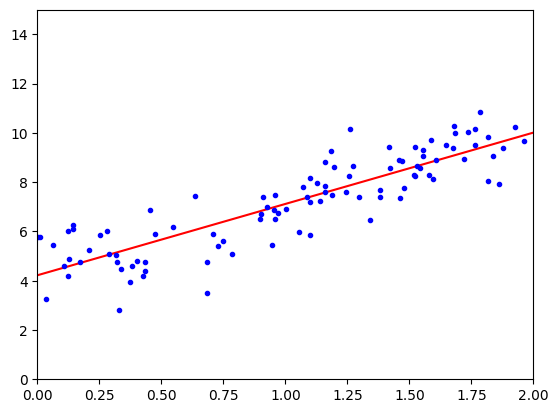

In [4]:
import matplotlib.pyplot as plt


plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

Gradient Decent

In [5]:
eta=0.1
n_iterations = 1000
m=100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients= 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta *gradients

theta

array([[4.22083236],
       [2.89495364]])

In [6]:
n_epochs = 50
t0, t1 = 5,50
m=100

def learning_schedule(t):
    return t0 / (t+t1)

theta =np.random.randn(2,1)


for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta
        

array([[4.26515611],
       [2.89056985]])

In [7]:
m=100
X=6* np.random.rand(m, 1) -3
y = 0.5 * X **2 + X +2 + np.random.randn(m, 1)


In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree =2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.55165546])

In [9]:
X_poly[0]

array([-0.55165546,  0.30432374])

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99973055]), array([[0.95999811, 0.51151882]]))

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

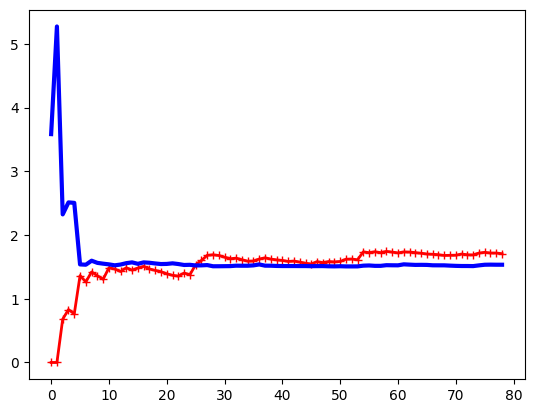

In [12]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

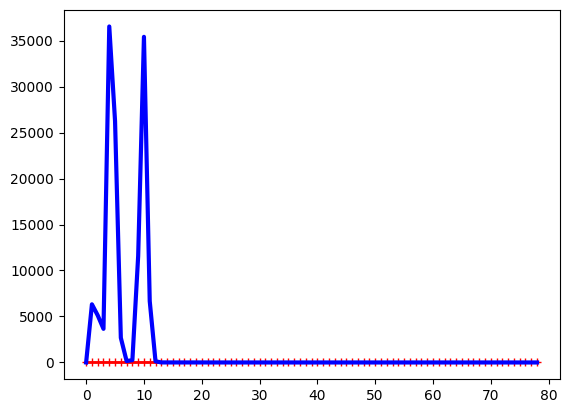

In [13]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))
plot_learning_curves(polynomial_regression, X, y)

In [14]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.17666727]])

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.14554701])

In [16]:
from sklearn.linear_model import Lasso
lasso_reg =  Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.1314126])

In [17]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.12864493])

In [ ]:
from sklearn.base import clone

sgd_reg=SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                    learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch= None
best_model= None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)